In [1]:
import pandas as pd
# Import Pandas to use DataFrames
import swifter
# To efficiently apply any function to a Pandas Data Frame or Series object in the quickest available method
import numpy as np
# Import Numpy which will hel in mathematical calculations 
import matplotlib.pyplot as plt
import seaborn as sns
# To Visualize Data
import json
# To Read Json Files
import os
# To Access system files/options
import glob
# To return all file paths that match a specific pattern
from tqdm import tqdm
# To Display progress when using loops

#-----------------------------------------------------------------------

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# To make feature extraction from spotify app

#-----------------------------------------------------------------------

import statsmodels
import sklearn
# To perform Statistical Analysis 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Import the PCA class function from sklearn




pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
# Tune some options in pandas 


%matplotlib inline
# To make any plot appear in jupyter notebook

In [2]:
DATASETS_PATH = 'C:/Users/LENOVO/Downloads/feature_engineering_dataset.csv' # change to the path of your csv file
# df_modified = pd.read_csv(os.path.join(DATASETS_PATH, 'feature_engineering_dataset.csv'))
df_modified = pd.read_csv(DATASETS_PATH)

In [3]:
df_modified

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4,79,1,1
266360,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,37,The Cure

In [4]:
numerical_features = (df_modified.dtypes == 'int64') | (df_modified.dtypes == 'float64')
numerical_columns = []
for i in range(len(numerical_features)):
    if numerical_features[i]:
        numerical_columns.append(df_modified.columns[i])
numerical_columns

['pid',
 'modified_at',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

In [5]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266363 entries, 0 to 266362
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pid                        266363 non-null  int64  
 1   name                       266363 non-null  object 
 2   description                5333 non-null    object 
 3   modified_at                266363 non-null  int64  
 4   num_artists                266363 non-null  int64  
 5   num_albums                 266363 non-null  int64  
 6   num_tracks                 266363 non-null  int64  
 7   num_followers              266363 non-null  int64  
 8   num_edits                  266363 non-null  int64  
 9   playlist_duration_ms       266363 non-null  int64  
 10  collaborative              266363 non-null  int64  
 11  pos                        266363 non-null  int64  
 12  artist_name                266363 non-null  object 
 13  track_uri                  26

In [6]:
positive_skewed = []
negative_skewed = []
for i in range(len(df_modified[numerical_columns].columns)):
    if (df_modified[numerical_columns].skew()[i]>0):
        positive_skewed.append(df_modified[numerical_columns].skew().index[i])
    else:
        negative_skewed.append(df_modified[numerical_columns].skew().index[i])

In [7]:
len(positive_skewed)

20

In [8]:
len(numerical_columns)

26

In [9]:
positive_skewed

['pid',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'key',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

In [11]:
def drawHist(df, column):
    fig, ax = plt.subplots()
    df[column].hist()
    ax.set_title(f"Skew Factor: {df[column].skew()}")
    ax.set_xlabel(f"{df[column].name}")
    return 0

0

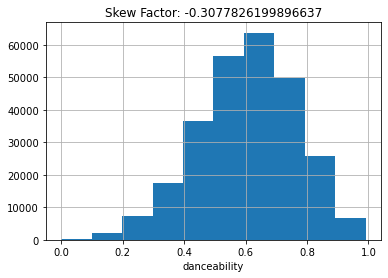

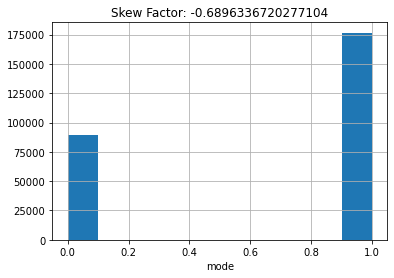

In [23]:
drawHist(df_modified, "danceability")
drawHist(df_modified, "mode")

In [24]:
negative_skewed = ["modified_at", "energy", "loudness", "time_signature"]

def tarnsform_columns(df, column, p):
    df1 = df.copy()
    if p == 'n':
        for i in range(len(df1[column].columns)):
            df1[df1[column].columns[i]] = np.exp(df1[df1[column].columns[i]])
    else:
            for i in range(len(df1[column].columns)):
                df1[df1[column].columns[i]] = np.log(((df1[df1[column].columns[i]])+1))
    return df1

0

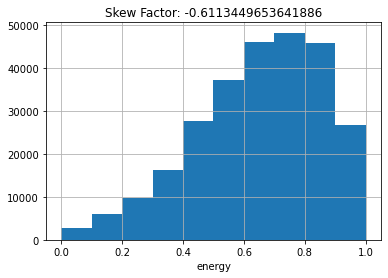

In [25]:
drawHist(df_modified, negative_skewed[1])

In [26]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, negative_skewed, 'n')
df_transformed.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,inf,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
1,123,w o r k o u t,NaN,inf,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
2,218,party playlist,NaN,inf,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
3,342,Dance mix,NaN,inf,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
4,382,spin,NaN,inf,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21


In [27]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, positive_skewed, 'p')
df_transformed.head()

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,Throwbacks,NaN,1493424000,3.64,3.87,3.97,0.69,1.95,16.26,0.0,0.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
1,4.82,w o r k o u t,NaN,1500681600,5.15,5.42,5.51,0.69,3.30,17.84,0.0,4.30,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
2,5.39,party playlist,NaN,1504310400,4.32,4.54,4.60,0.69,1.61,16.87,0.0,2.71,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
3,5.84,Dance mix,NaN,1473724800,4.72,4.85,5.12,0.69,2.77,17.58,0.0,3.76,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
4,5.95,spin,NaN,1505347200,2.64,2.71,2.71,1.10,1.79,15.10,0.0,0.69,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5840\238782014.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_modified[numerical_columns].hist(ax = ax, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'collaborative'}>,
        <AxesSubplot:title={'center':'pos'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalnes

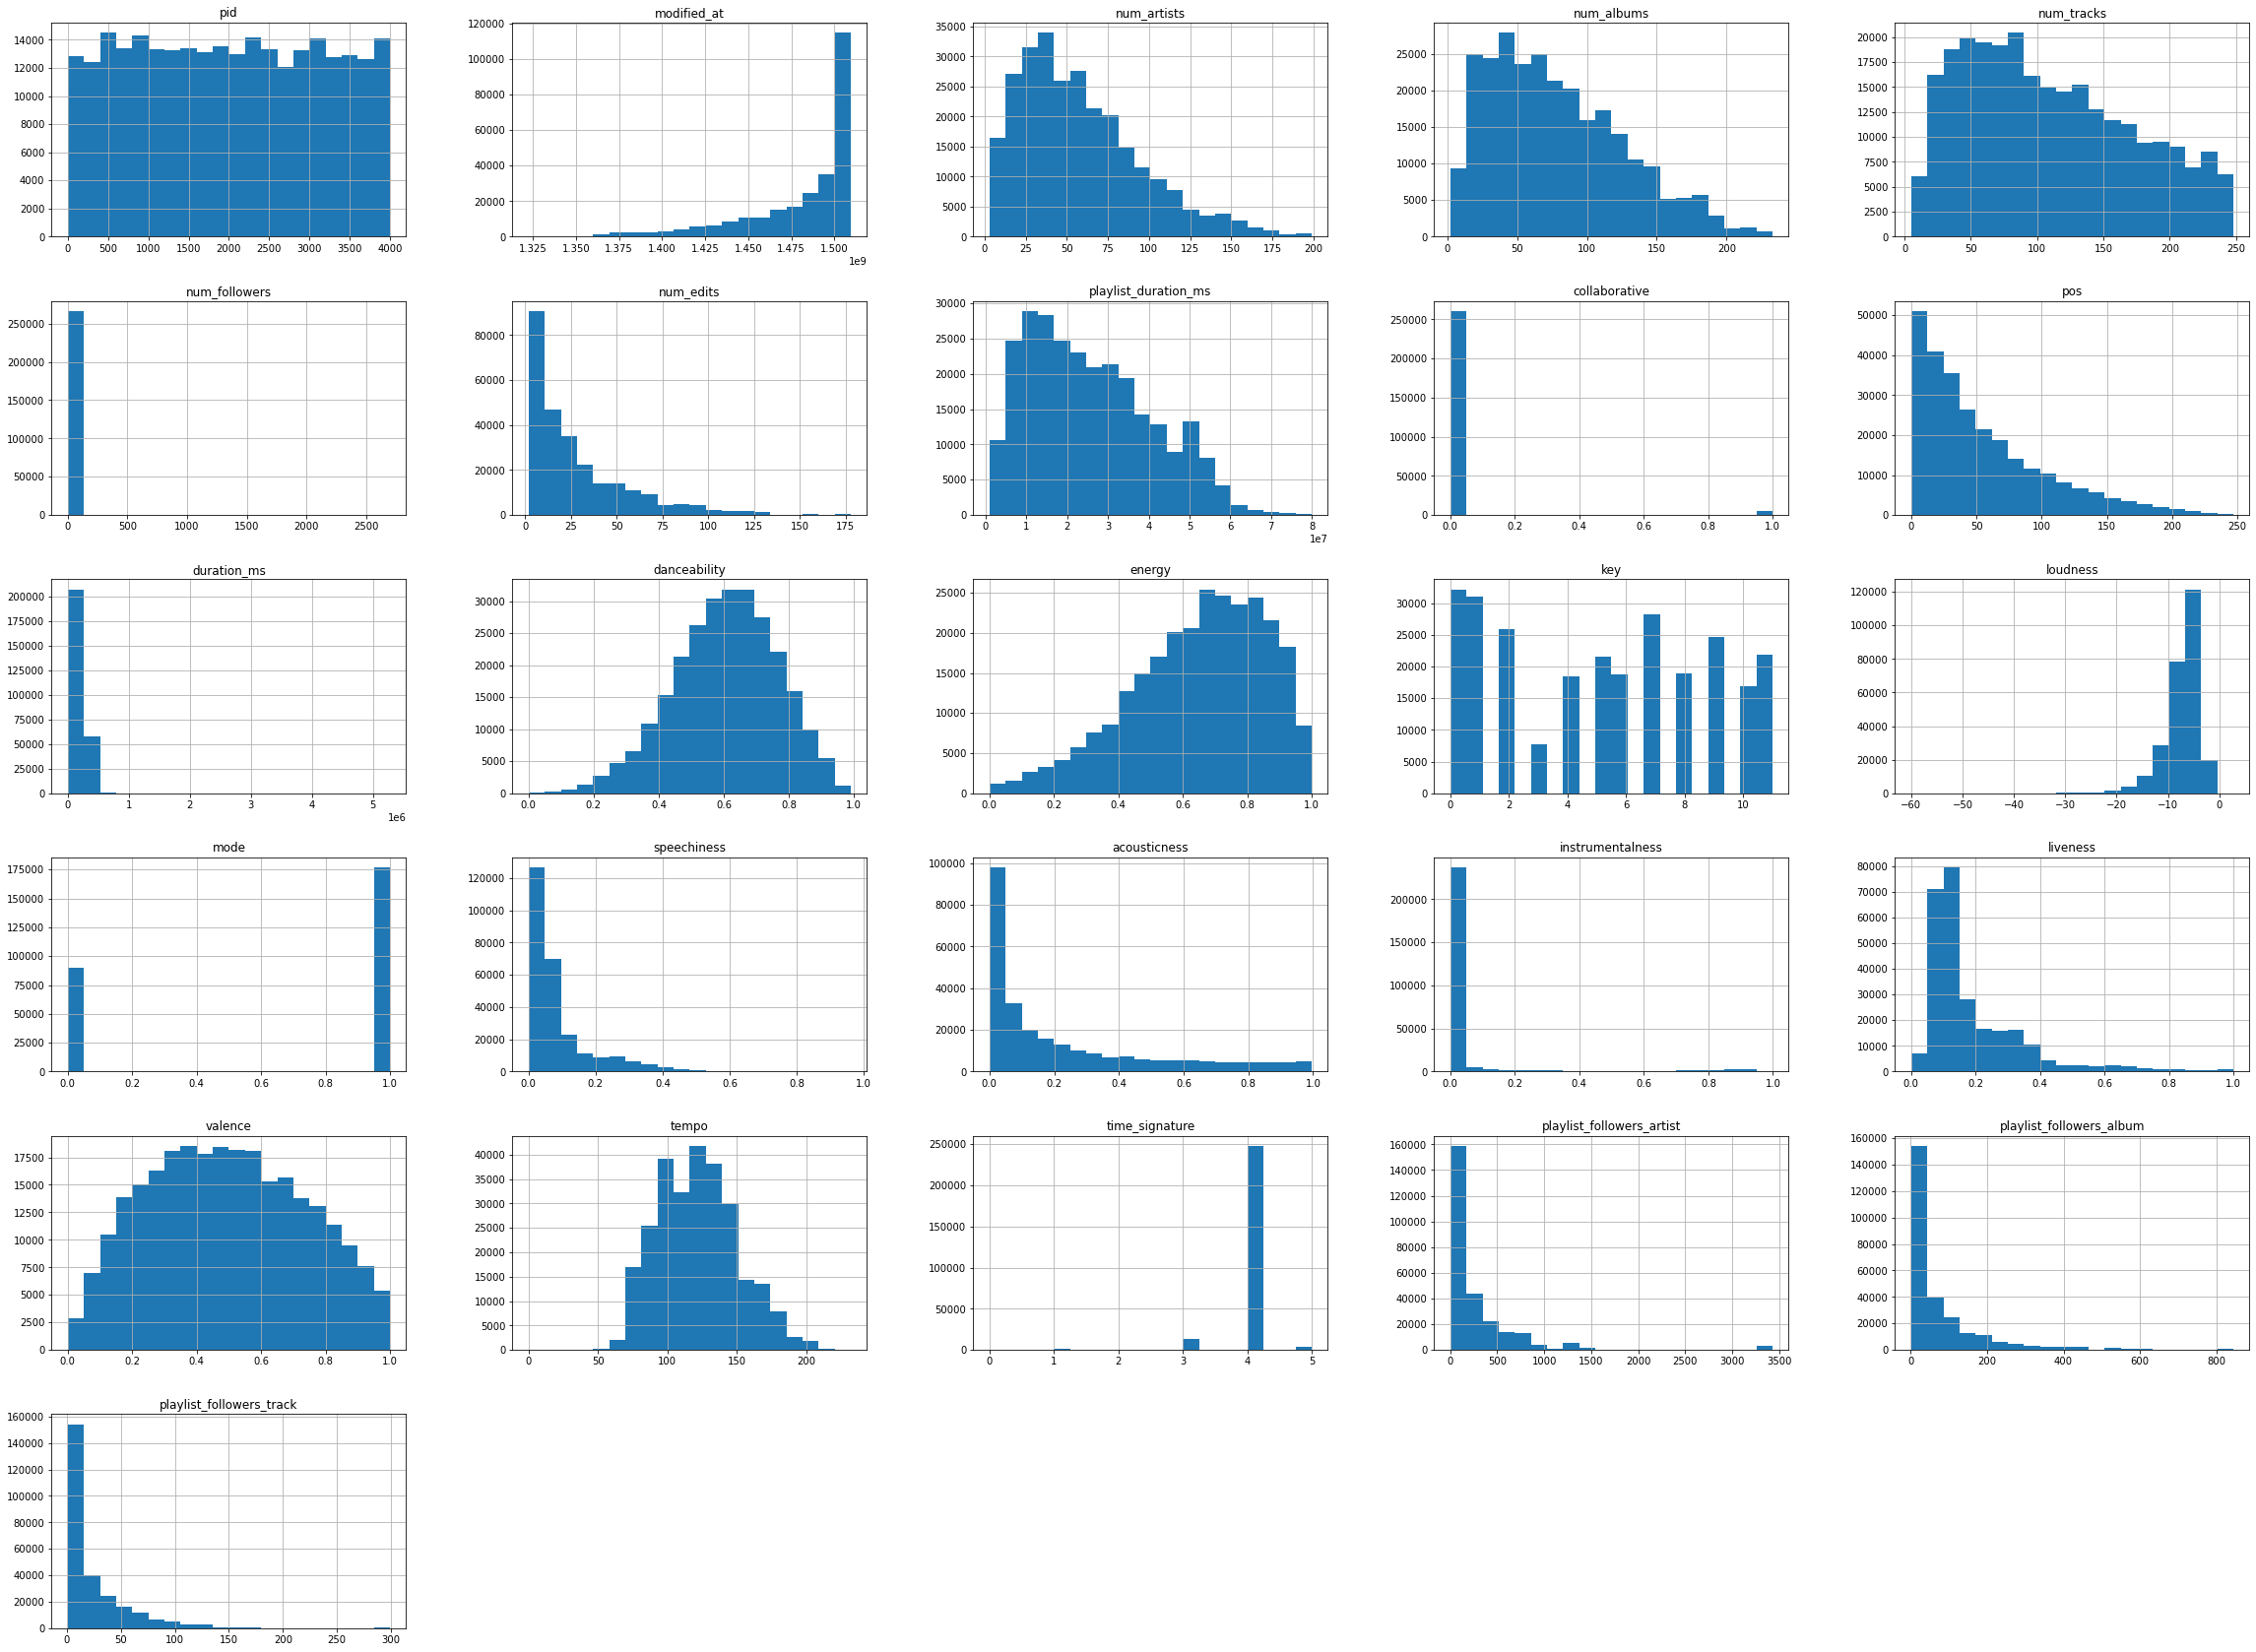

In [28]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
df_modified[numerical_columns].hist(ax = ax, bins=20)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5840\803111950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_transformed[numerical_columns].hist(ax = ax, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'collaborative'}>,
        <AxesSubplot:title={'center':'pos'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalnes

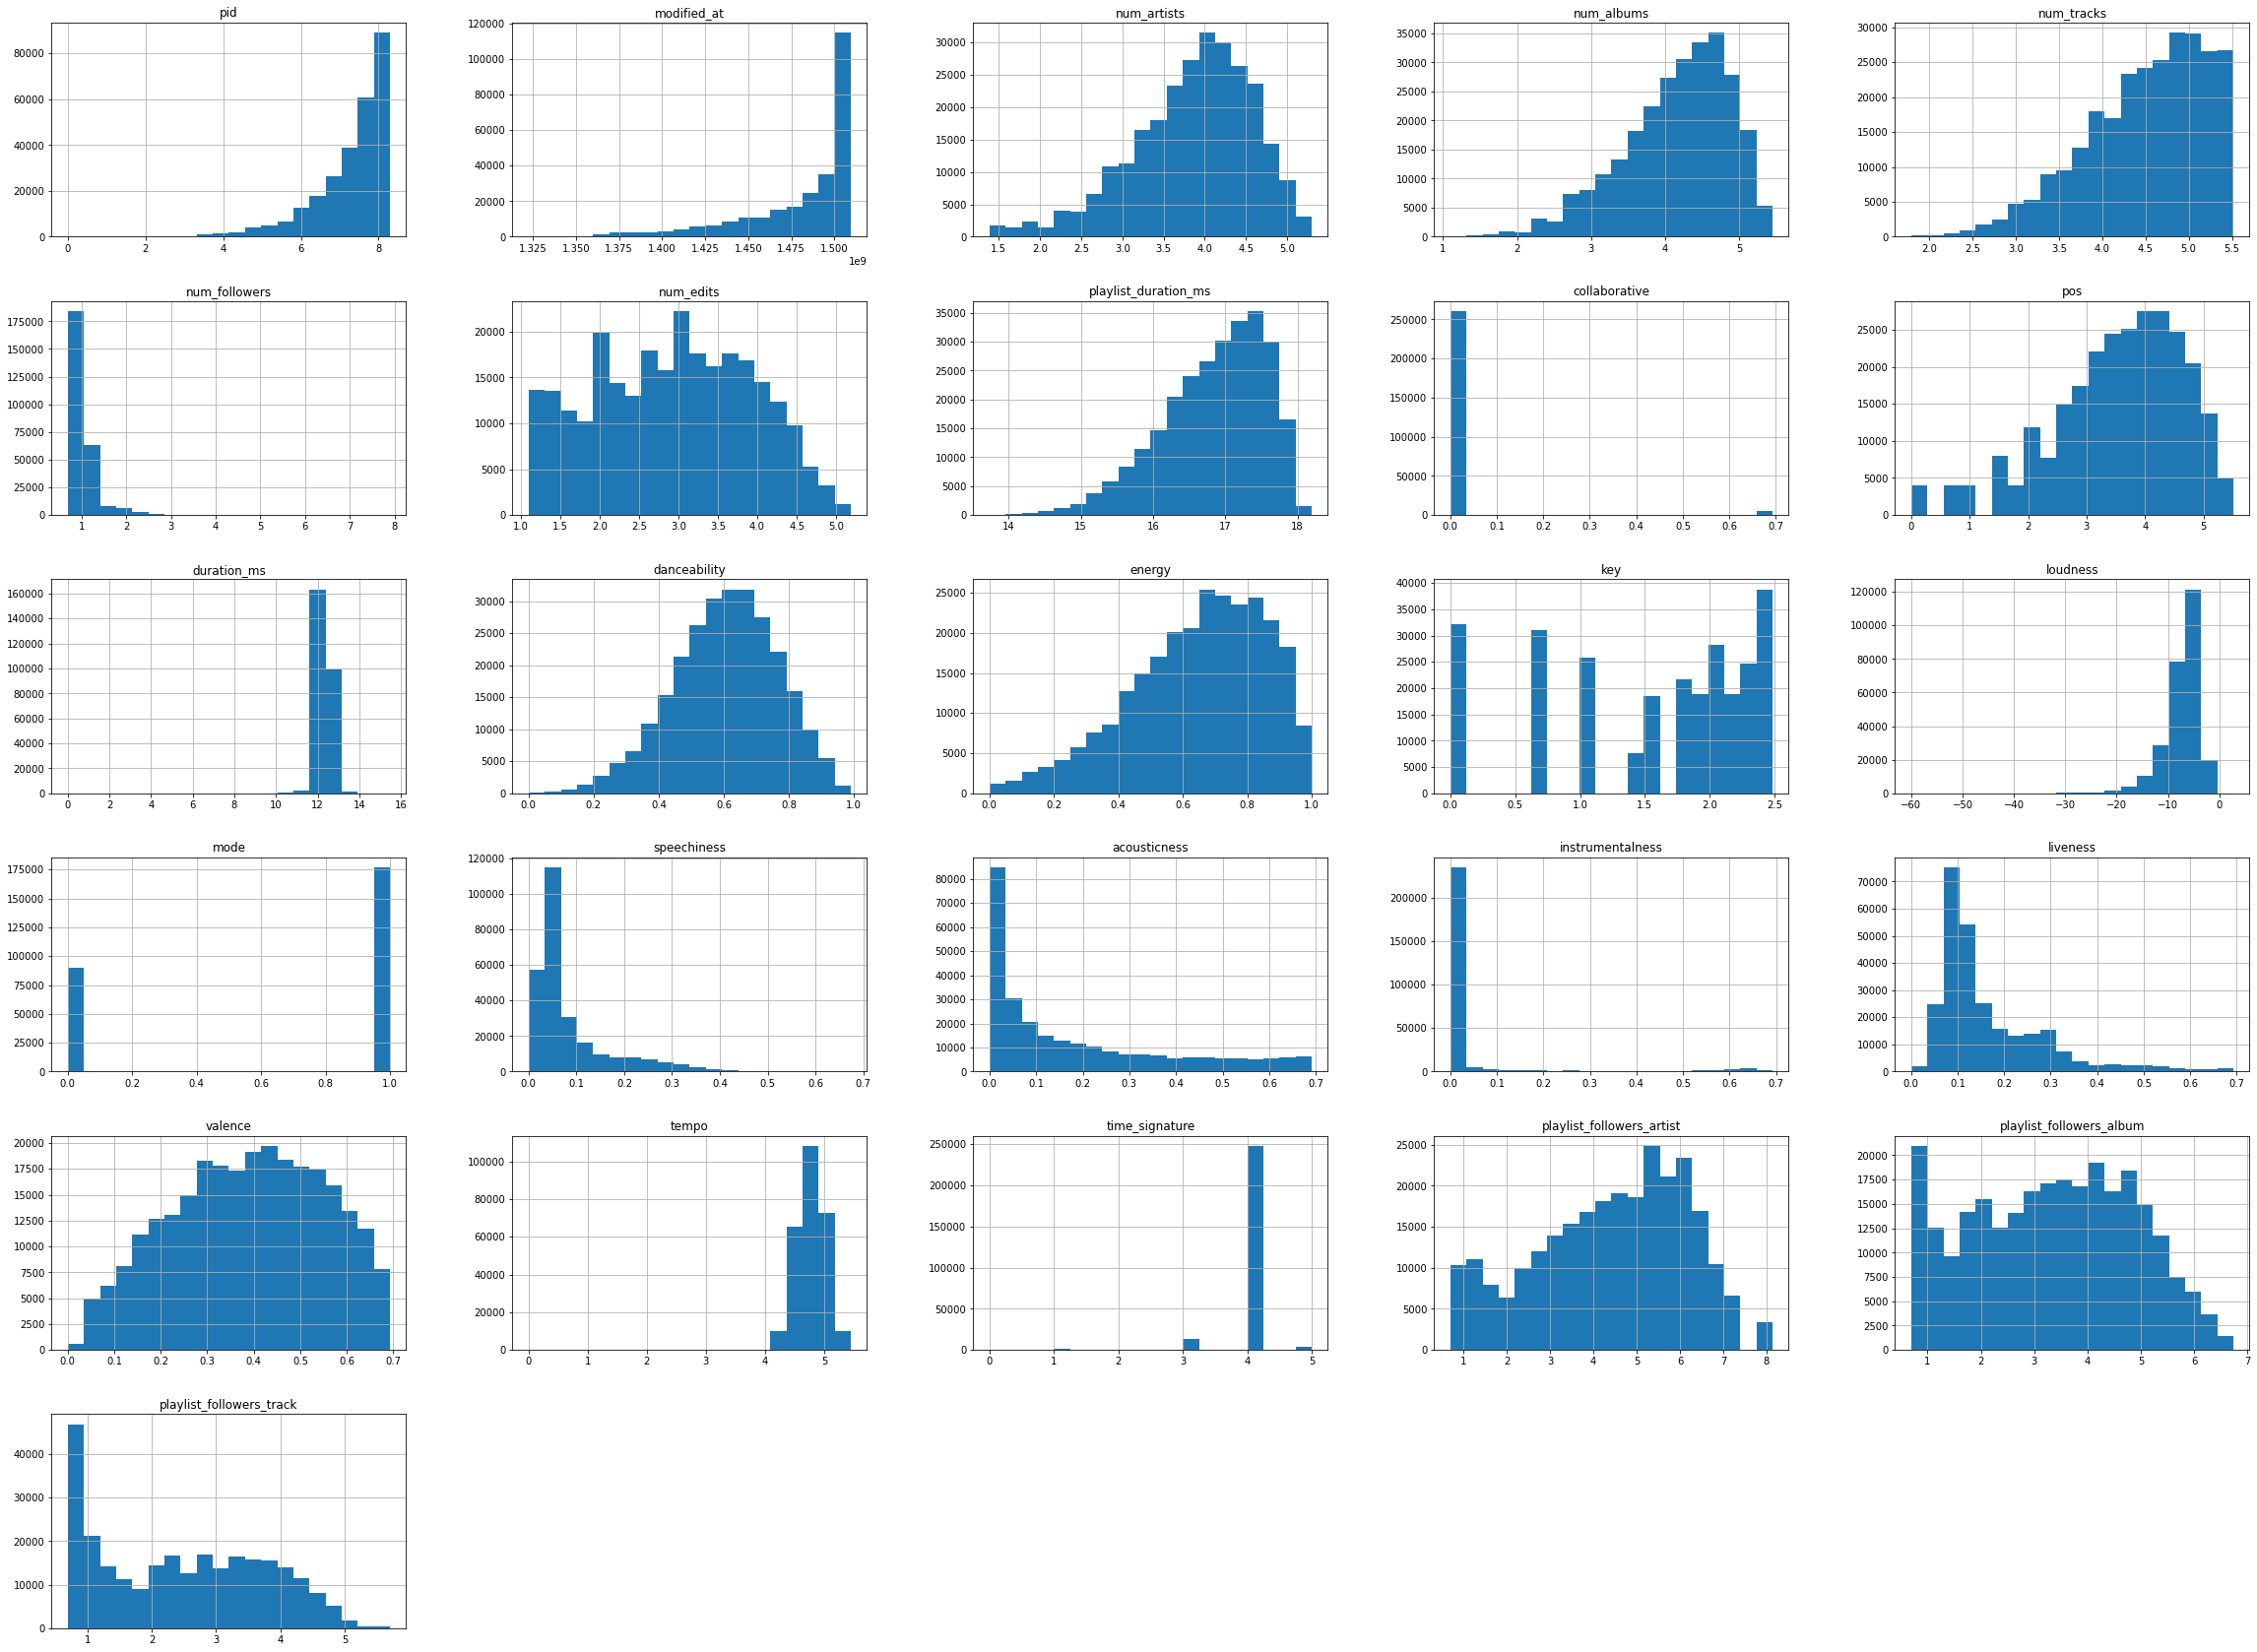

In [29]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
df_transformed[numerical_columns].hist(ax = ax, bins=20)

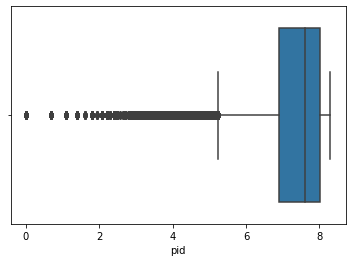

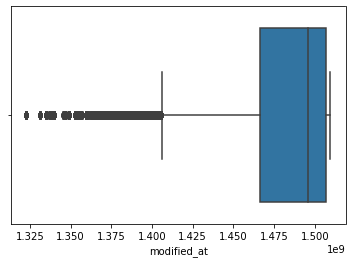

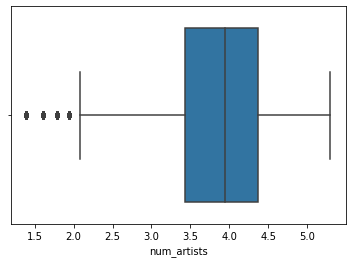

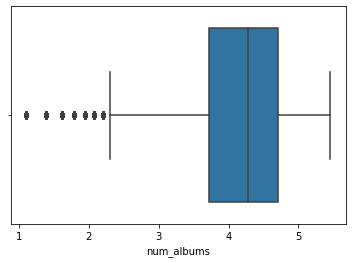

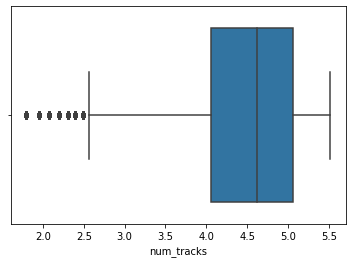

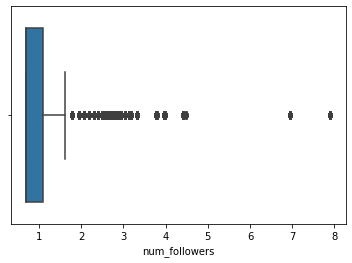

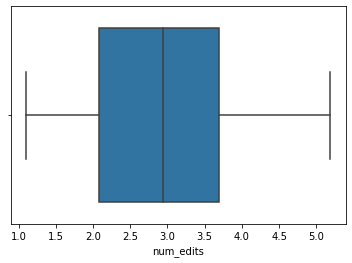

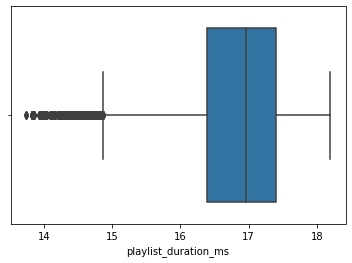

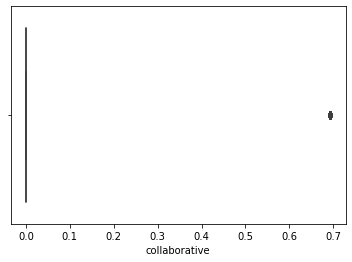

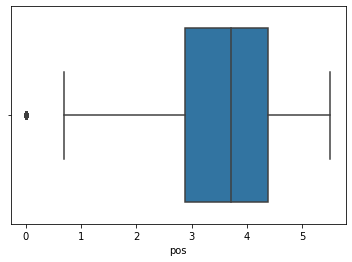

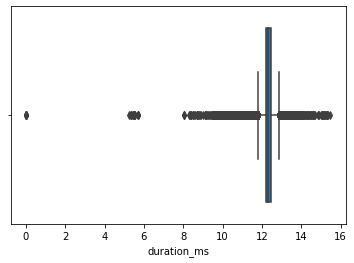

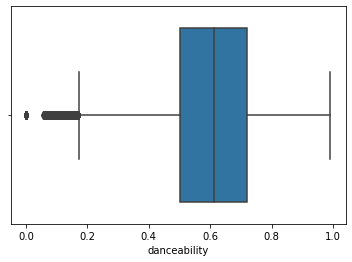

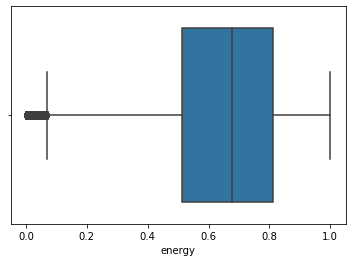

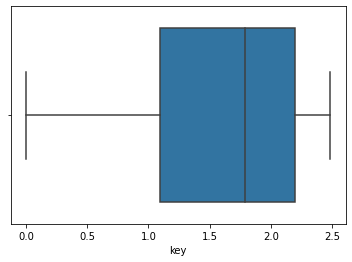

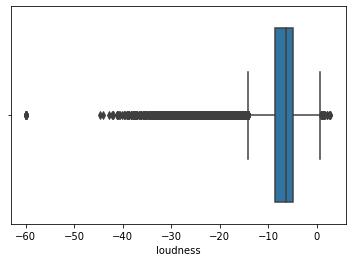

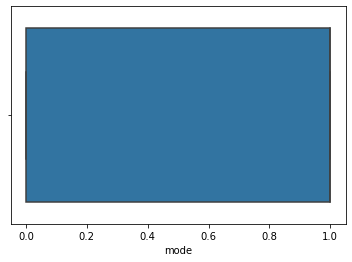

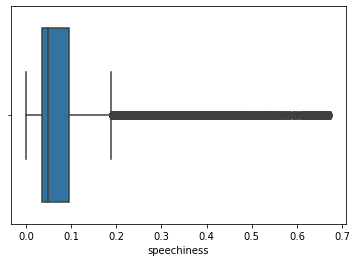

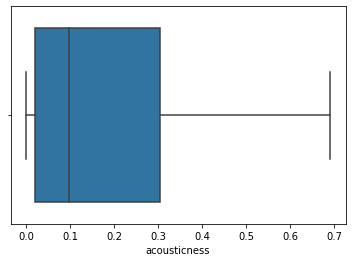

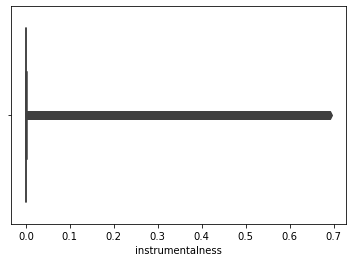

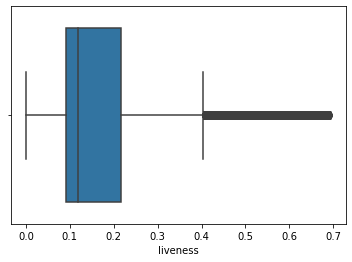

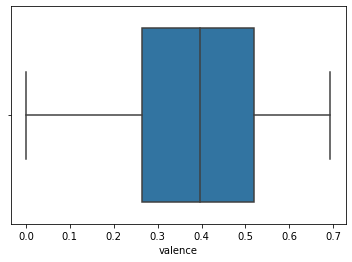

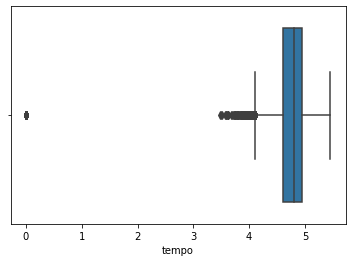

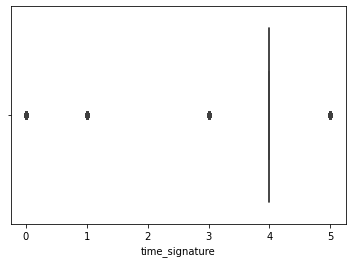

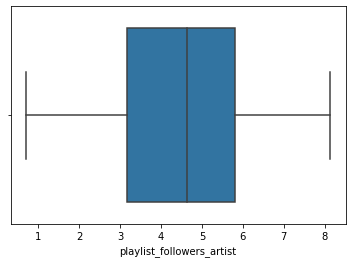

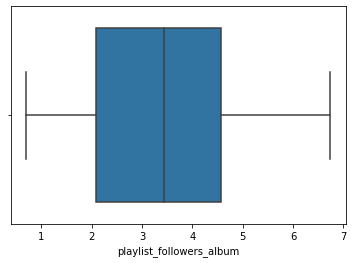

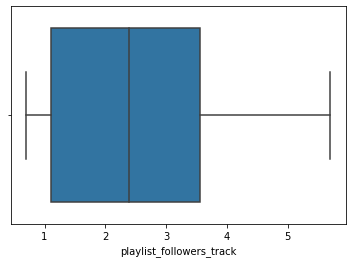

In [30]:
for col in numerical_columns:
    sns.boxplot(df_transformed[col])
    plt.show()

In [31]:
def remove_outliers(df, numericalColumns):
    df1 = df.copy()
    for col in numericalColumns:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df1[col][(df1[col]<lower)]=lower
        df1[col][(df1[col]>upper)]=upper
    return df1

In [32]:
df_cleaned = remove_outliers(df_transformed, numerical_columns)
df_cleaned

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5840\1796915527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]<lower)]=lower
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5840\1796915527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]>upper)]=upper


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,5.23,Throwbacks,NaN,1493424000,3.64,3.87,3.97,0.69,1.95,16.26,0.0,0.65,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
1,5.23,w o r k o u t,NaN,1500681600,5.15,5.42,5.51,0.69,3.30,17.84,0.0,4.30,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
2,5.39,party playlist,NaN,1504310400,4.32,4.54,4.60,0.69,1.61,16.87,0.0,2.71,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
3,5.84,Dance mix,NaN,1473724800,4.72,4.85,5.12,0.69,2.77,17.58,0.0,3.76,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
4,5.95,spin,NaN,1505347200,2.64,2.71,2.71,1.10,1.79,15.10,0.0,0.69,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,8.29,other,NaN,1420848000,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.37,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,12.37,Love Is A Four Letter Word,0.65,0.63,2.08,-7.16,1,0.02,4.72e-02,0.00e+00,0.11,0.53,4.44,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,5.52,4.38,0.69
266359,8.29,other,NaN,1420848000,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.61,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,12.57,Galore - The Singles 1987-1997,0.46,0.74,2.30,-6.10,1,0.03,4.47e-03,1.83e-03,0.12,0.49,5.16,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,ht

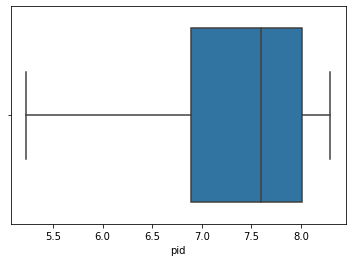

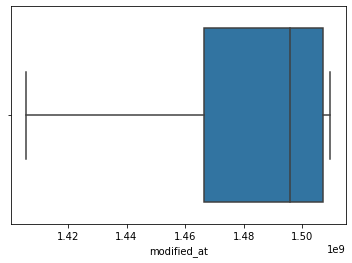

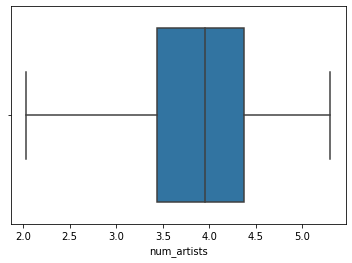

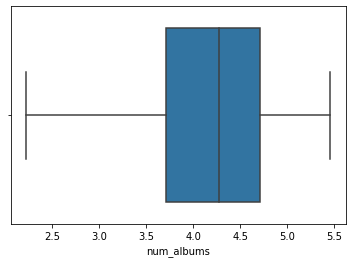

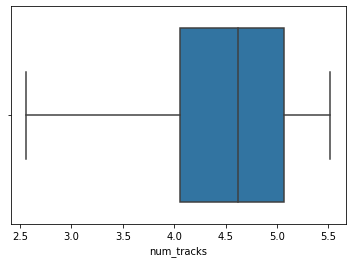

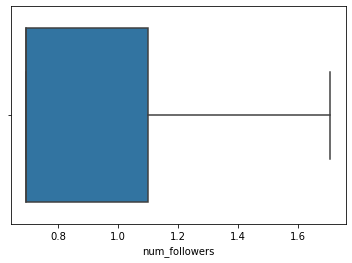

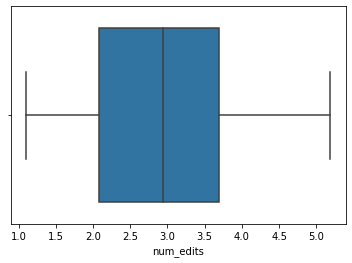

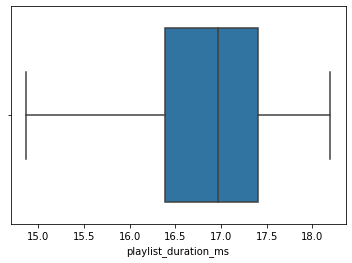

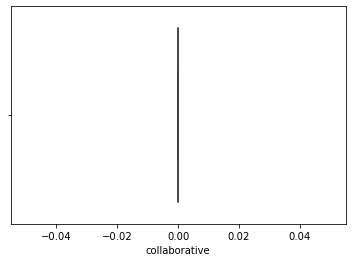

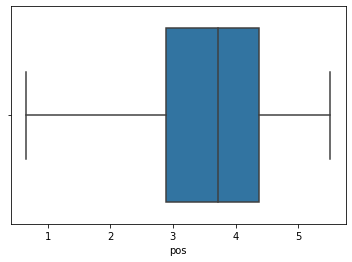

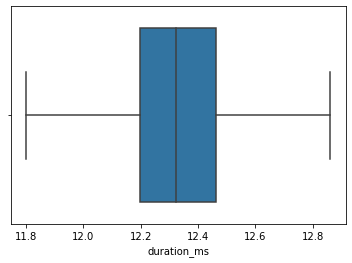

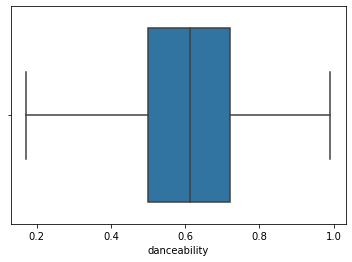

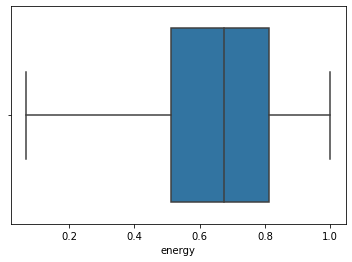

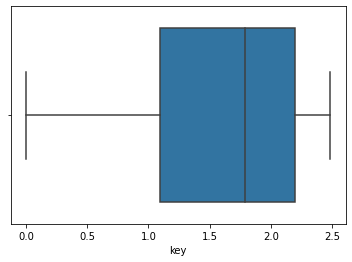

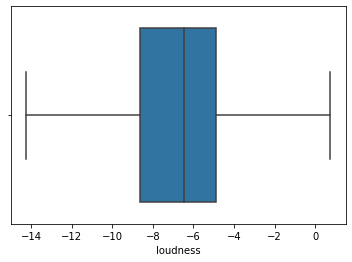

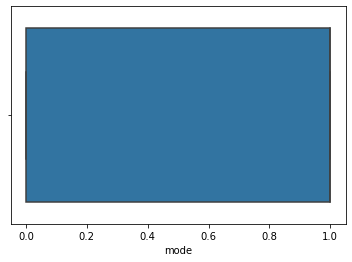

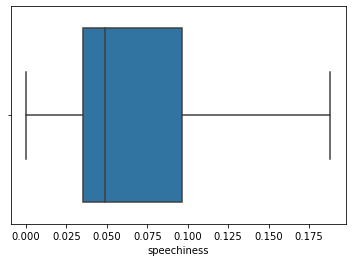

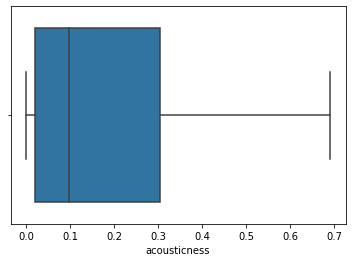

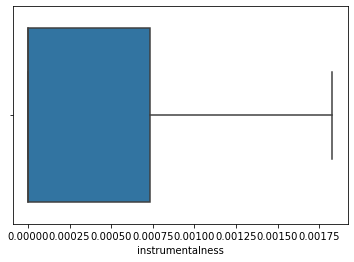

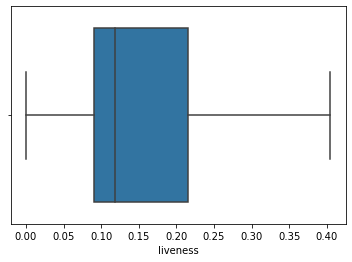

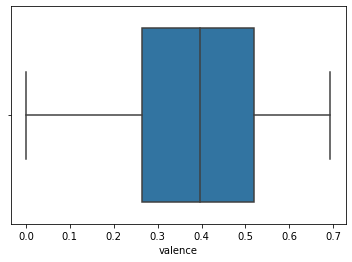

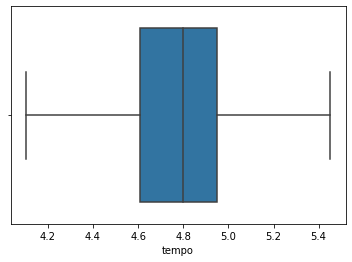

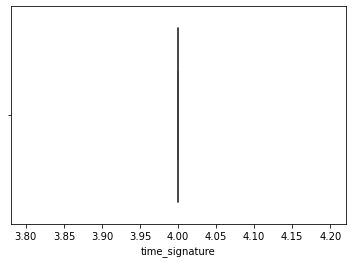

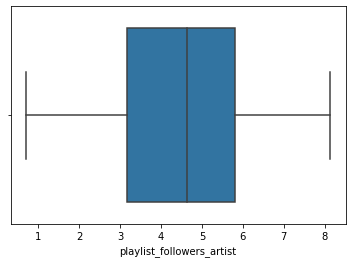

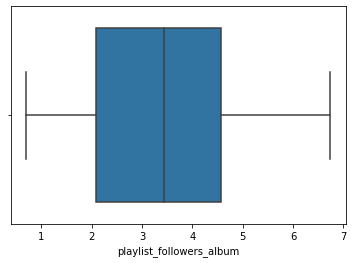

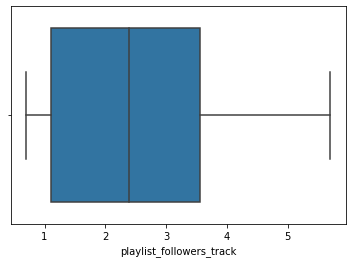

In [33]:
for col in numerical_columns:
    sns.boxplot(df_cleaned[col])
    plt.show()

In [34]:
scaler = MinMaxScaler()

# transform data
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_columns]), columns = df_cleaned[numerical_columns].columns)
df_scaled

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,0.85,0.49,0.51,0.48,0.0,0.21,0.42,0.0,0.00e+00,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
1,0.00,0.92,0.95,0.99,1.00,0.0,0.54,0.89,0.0,7.51e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
2,0.05,0.95,0.70,0.72,0.69,0.0,0.12,0.60,0.0,4.23e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
3,0.20,0.66,0.82,0.81,0.87,0.0,0.41,0.82,0.0,6.39e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
4,0.23,0.96,0.19,0.15,0.05,0.4,0.17,0.07,0.0,8.28e-03,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,5.58e-01,0.54,0.58,0.60,0.84,0.47,1.0,0.12,6.82e-02,0.0,0.28,0.77,0.25,0.0,0.65,0.61,0.00
266359,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.09e-01,0.73,0.35,0.73,0.93,0.54,1.0,0.17,6.47e-03,1.0,0.29,0.71,0.78,0.0,0.50,0.00,0.00
266360,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.14e-01,0.64,0.66,0.66,1.00,0.37,1.0,0.27,7.39e-02,1.0,0.15,0.83,0.32,0.0,0.50,0.00,0.00
266361,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.25e-01,0.58,0.68,0.67,0.93,0.46,1.0,0.19,2.03e-01,1.0,0.19,0.68,0.33,0.0,0.50,0.93,0.37


In [36]:
df_scaled.nunique()

pid                           3815
modified_at                    980
num_artists                    161
num_albums                     194
num_tracks                     235
num_followers                    5
num_edits                      124
playlist_duration_ms          3746
collaborative                    1
pos                            248
duration_ms                  36676
danceability                   817
energy                        1175
key                             12
loudness                     12448
mode                             2
speechiness                    886
acousticness                  4601
instrumentalness              2775
liveness                      1220
valence                       1646
tempo                        49173
time_signature                   1
playlist_followers_artist      368
playlist_followers_album       258
playlist_followers_track       145
dtype: int64

In [37]:
df_new = df_scaled.drop(['collaborative', 'time_signature', 'pid', 'modified_at', 'pos'], axis=1)
df_new

,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.49,0.51,0.48,0.0,0.21,0.42,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
1,0.95,0.99,1.00,0.0,0.54,0.89,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
2,0.70,0.72,0.69,0.0,0.12,0.60,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
3,0.82,0.81,0.87,0.0,0.41,0.82,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
4,0.19,0.15,0.05,0.4,0.17,0.07,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,0.26,0.56,0.68,0.0,0.29,0.62,0.54,0.58,0.60,0.84,0.47,1.0,0.12,6.82e-02,0.0,0.28,0.77,0.25,0.65,0.61,0.00
266359,0.26,0.56,0.68,0.0,0.29,0.62,0.73,0.35,0.73,0.93,0.54,1.0,0.17,6.47e-03,1.0,0.29,0.71,0.78,0.50,0.00,0.00
266360,0.26,0.56,0.68,0.0,0.29,0.62,0.64,0.66,0.66,1.00,0.37,1.0,0.27,7.39e-02,1.0,0.15,0.83,0.32,0.50,0.00,0.00
266361,0.26,0.56,0.68,0.0,0.29,0.62,0.58,0.68,0.67,0.93,0.46,1.0,0.19,2.03e-01,1.0,0.19,0.68,0.33,0.50,0.93,0.37


The cumulative variance of the first two principal components is 0.43338


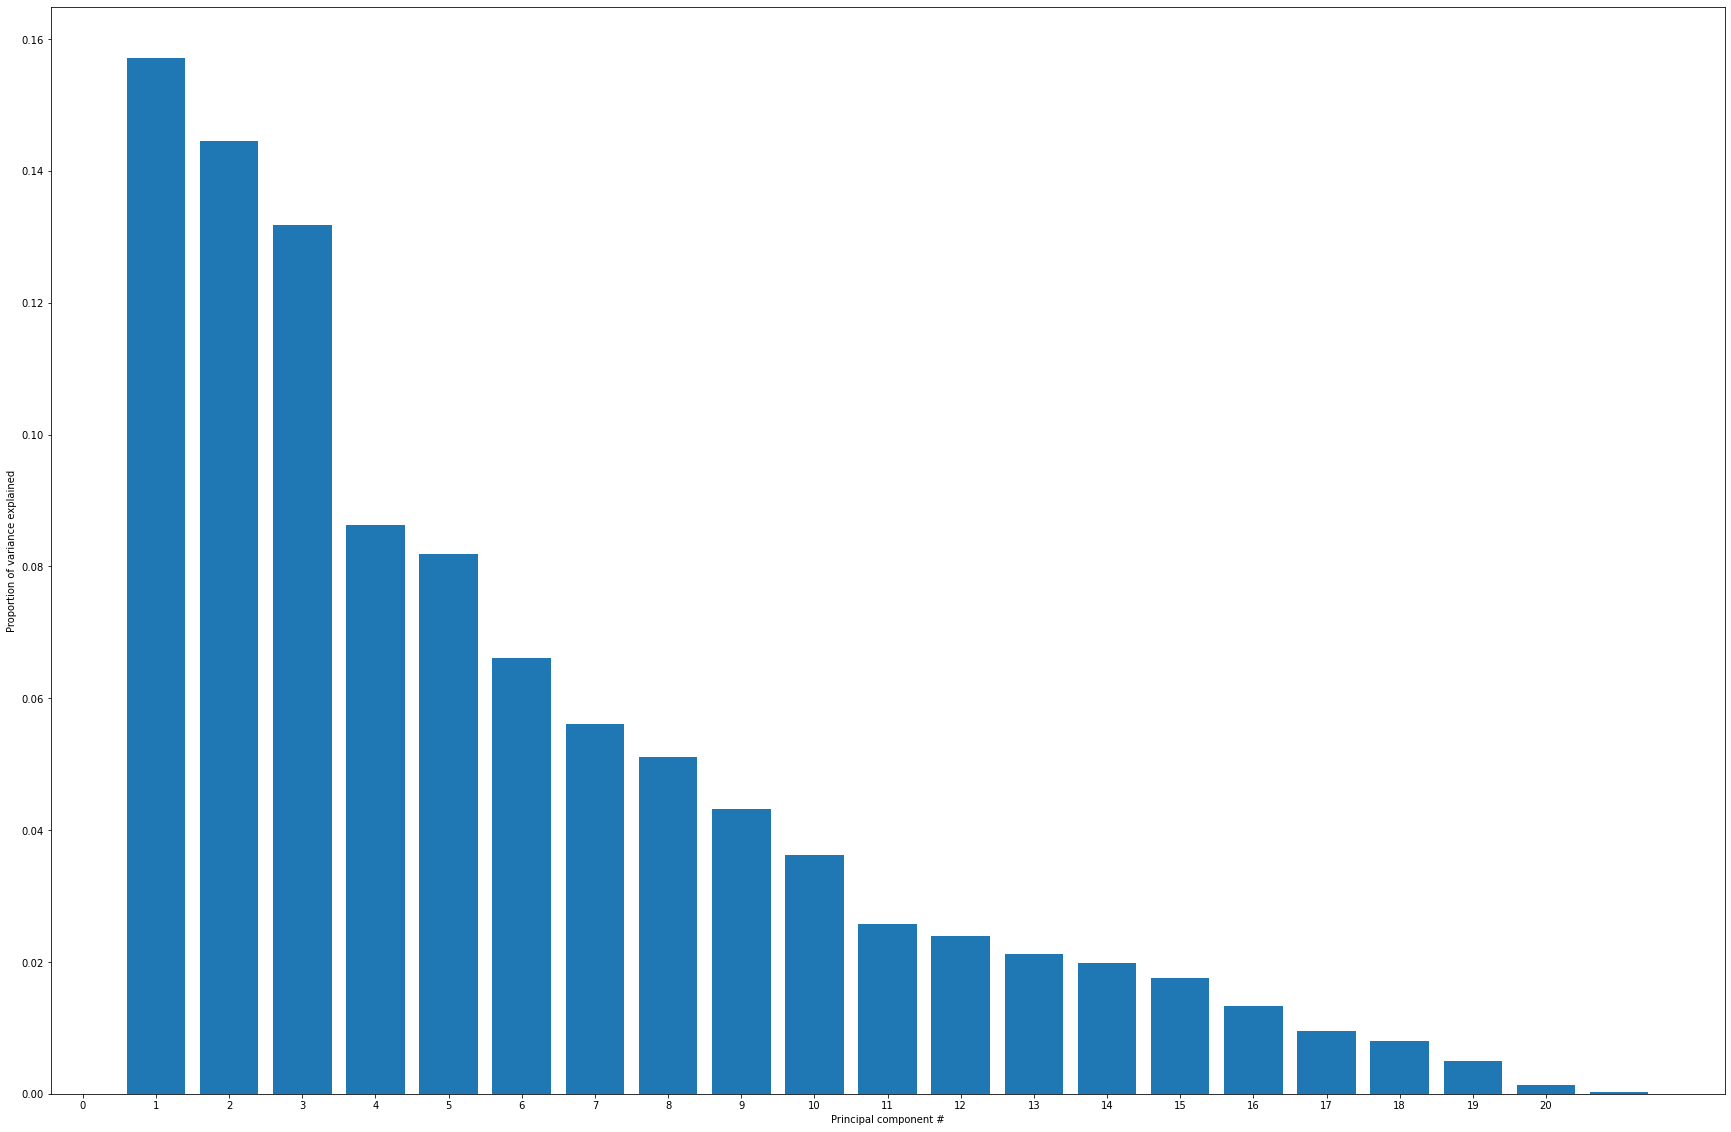

In [38]:
# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(df_new)

# Plot the proportion of variance explained on the y-axis of the bar plot
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 20))
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(df_new.shape[1]))

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[2]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

In [39]:
positive_skewed

['pid',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'key',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

In [52]:
positive_skewed=df_new[['num_artists','num_albums','num_tracks','num_followers','num_edits','playlist_duration_ms','duration_ms','key','speechiness','acousticness','instrumentalness','liveness','valence','tempo','playlist_followers_artist','playlist_followers_album','playlist_followers_track']]
 

In [53]:
positive_skewed

,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,duration_ms,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.49,0.51,0.48,0.0,0.21,0.42,0.50,0.65,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
1,0.95,0.99,1.00,0.0,0.54,0.89,0.50,0.65,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
2,0.70,0.72,0.69,0.0,0.12,0.60,0.50,0.65,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
3,0.82,0.81,0.87,0.0,0.41,0.82,0.50,0.65,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
4,0.19,0.15,0.05,0.4,0.17,0.07,0.50,0.65,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.56,0.40,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,0.26,0.56,0.68,0.0,0.29,0.62,0.54,0.84,0.12,6.82e-02,0.0,0.28,0.77,0.25,0.65,0.61,0.00
266359,0.26,0.56,0.68,0.0,0.29,0.62,0.73,0.93,0.17,6.47e-03,1.0,0.29,0.71,0.78,0.50,0.00,0.00
266360,0.26,0.56,0.68,0.0,0.29,0.62,0.64,1.00,0.27,7.39e-02,1.0,0.15,0.83,0.32,0.50,0.00,0.00
266361,0.26,0.56,0.68,0.0,0.29,0.62,0.58,0.93,0.19,2.03e-01,1.0,0.19,0.68,0.33,0.50,0.93,0.37


# Applying Box-Cox

In [58]:
num_artists=positive_skewed['num_artists']+0.00000000000000000001
num_albums=positive_skewed['num_albums']+0.00000000000000000001
num_tracks=positive_skewed['num_tracks']+0.00000000000000000001
num_followers=positive_skewed['num_followers']+0.00000000000000000001
num_edits=positive_skewed['num_edits']+0.00000000000000000001
playlist_duration_ms=positive_skewed['playlist_duration_ms']+0.00000000000000000001
duration_ms=positive_skewed['duration_ms']+0.00000000000000000001
key=positive_skewed['key']+0.00000000000000000001
speechiness=positive_skewed['speechiness']+0.00000000000000000001
acousticness=positive_skewed['acousticness']+0.00000000000000000001
instrumentalness=positive_skewed['instrumentalness']+0.00000000000000000001
liveness=positive_skewed['liveness']+0.00000000000000000001
valence=positive_skewed['valence']+0.00000000000000000001
tempo=positive_skewed['tempo']+0.00000000000000000001
playlist_followers_artist=positive_skewed['playlist_followers_artist']+0.00000000000000000001
playlist_followers_album=positive_skewed['playlist_followers_album']+0.00000000000000000001
playlist_followers_track=positive_skewed['playlist_followers_track']+0.00000000000000000001


Lambda value used for Transformation: 0.45803400883826545


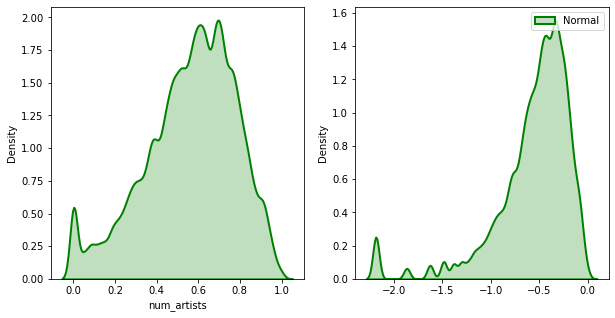

In [59]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(num_artists)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(num_artists, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.5507486542566502


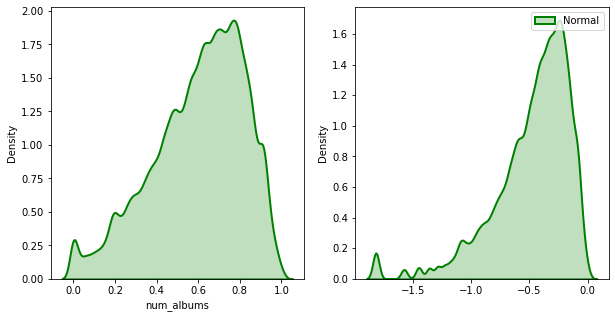

In [63]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(num_albums)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(num_albums, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.45803400883826545


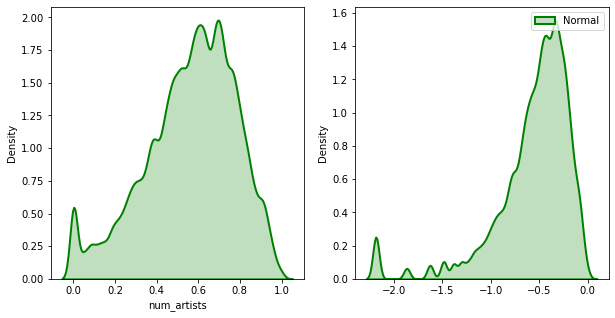

In [64]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(num_artists)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(num_artists, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.6791240725335526


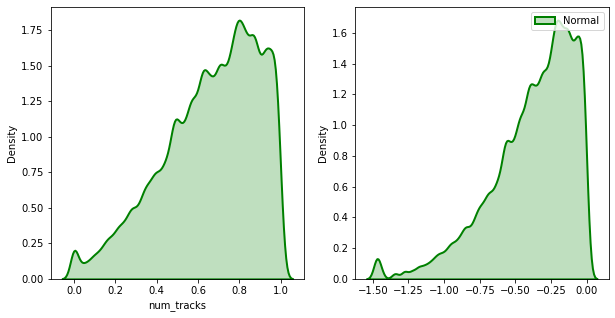

In [65]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(num_tracks)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(num_tracks, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Lambda value used for Transformation: -0.0556982201027591


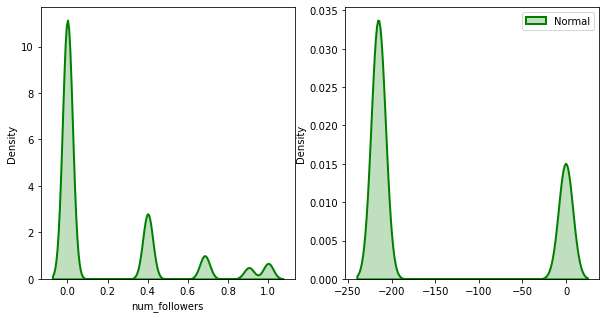

In [66]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(num_followers)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(num_followers, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.28130449012687475


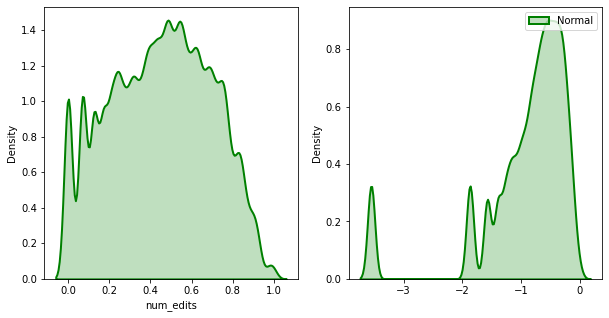

In [67]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(num_edits)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(num_edits, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.6054337552099723


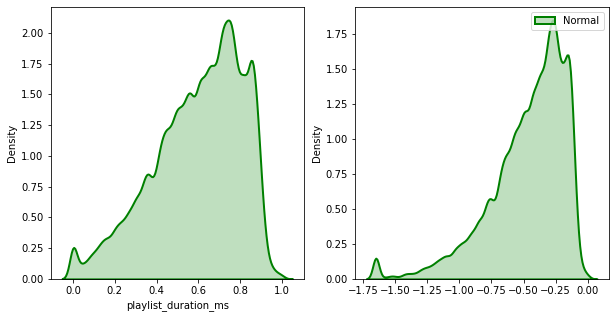

In [68]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(playlist_duration_ms)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(playlist_duration_ms, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.4258502416987207


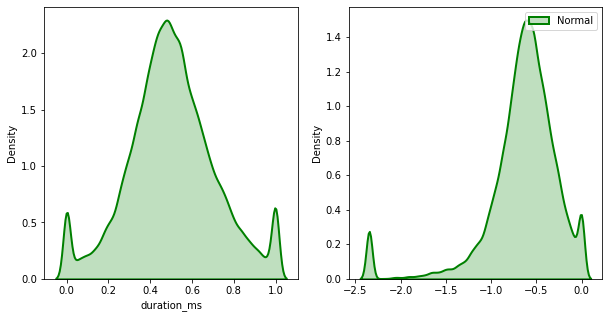

In [69]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(duration_ms)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(duration_ms, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.17321917079436777


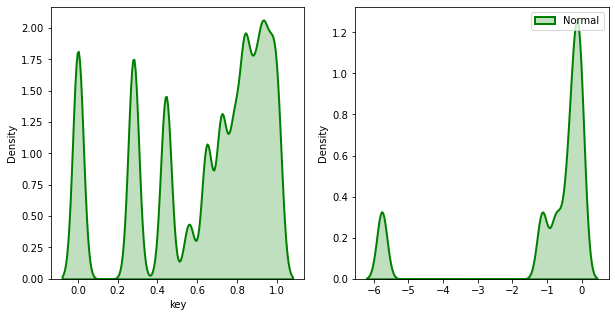

In [70]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(key)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(key, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.1352731518170929


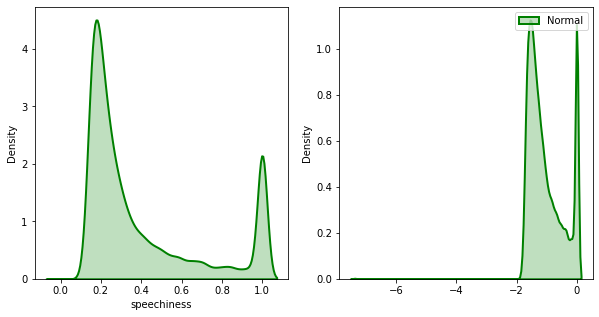

In [71]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(speechiness)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(speechiness, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.25203352454377903


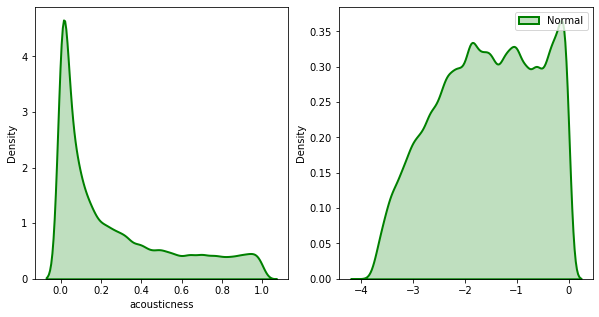

In [72]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(acousticness)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(acousticness, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.014136606029493789


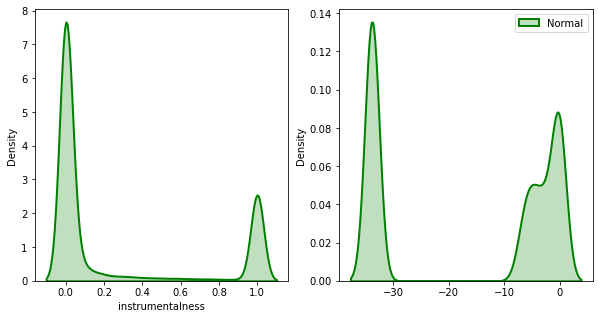

In [73]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(instrumentalness)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(instrumentalness, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.15286594201775489


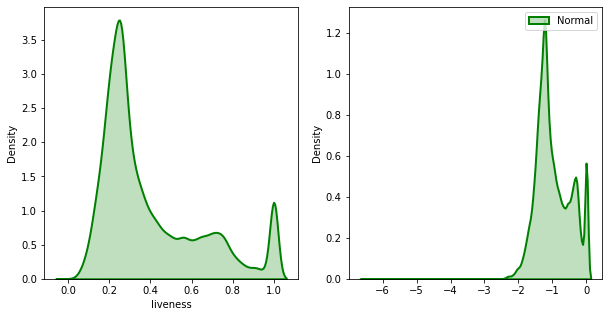

In [74]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(liveness)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(liveness, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.9289160650975344


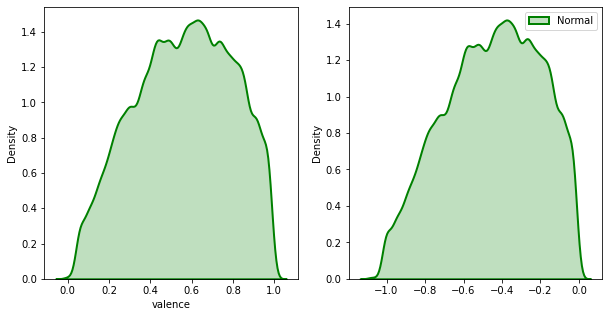

In [75]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(valence)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(valence, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.7666367410913768


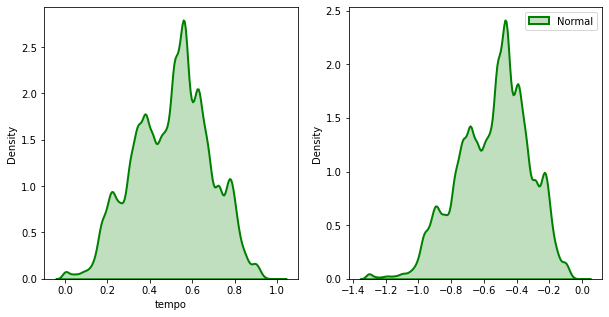

In [76]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(tempo)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(tempo, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.3333217446274376


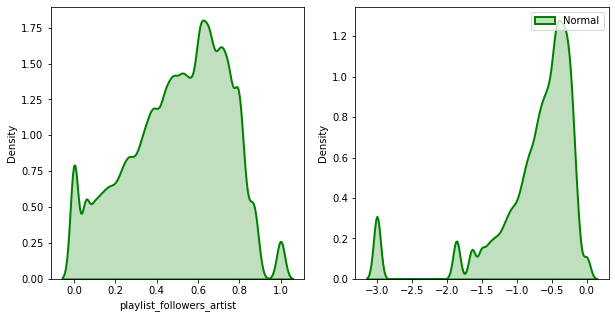

In [77]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(playlist_followers_artist)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(playlist_followers_artist, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.2253856545095257


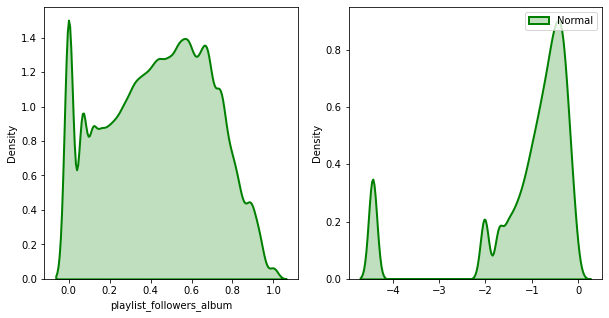

In [78]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(playlist_followers_album)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(playlist_followers_album, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.11813856851487728


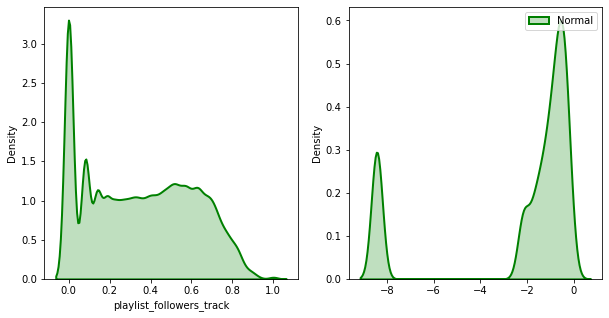

In [79]:
from scipy import stats
import seaborn as sns
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(playlist_followers_track)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(playlist_followers_track, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [89]:
df_modified

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4,79,1,1
266360,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,37,The Cure

In [92]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266363 entries, 0 to 266362
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pid                        266363 non-null  int64  
 1   name                       266363 non-null  object 
 2   description                5333 non-null    object 
 3   modified_at                266363 non-null  int64  
 4   num_artists                266363 non-null  int64  
 5   num_albums                 266363 non-null  int64  
 6   num_tracks                 266363 non-null  int64  
 7   num_followers              266363 non-null  int64  
 8   num_edits                  266363 non-null  int64  
 9   playlist_duration_ms       266363 non-null  int64  
 10  collaborative              266363 non-null  int64  
 11  pos                        266363 non-null  int64  
 12  artist_name                266363 non-null  object 
 13  track_uri                  26

In [95]:
df_modified['modified_at'].dtype

dtype('int64')

In [96]:
df_modified['modified_at'].value_counts()

1509408000    6056
1509321600    5394
1509062400    4422
1509148800    4041
1509235200    3801
              ... 
1389484800       7
1418688000       7
1394496000       6
1440460800       5
1371945600       5
Name: modified_at, Length: 1197, dtype: int64

# Derived Features


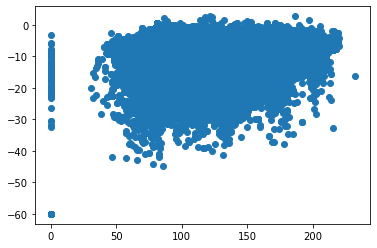

In [105]:
plt.scatter(df_modified['tempo'],df_modified['loudness'])

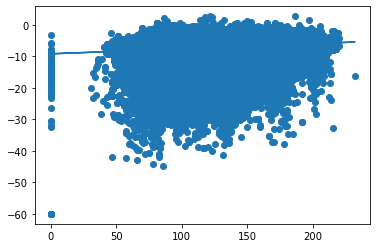

In [106]:
x=df_modified['tempo']
y=df_modified['loudness']

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[1.25461000e+02 1.57404625e+04 1.97481417e+06]
 [1.25461000e+02 1.57404625e+04 1.97481417e+06]
 [1.25461000e+02 1.57404625e+04 1.97481417e+06]
 ...
 [9.24040000e+01 8.53849922e+03 7.88991482e+05]
 [9.40230000e+01 8.84032453e+03 8.31193833e+05]
 [7.81390000e+01 6.10570332e+03 4.77093552e+05]]


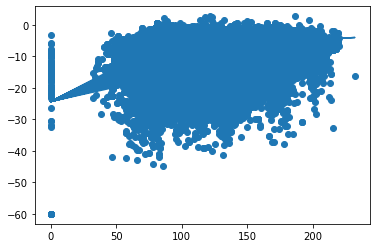

In [108]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)